In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the athletes file
athletes = pd.read_csv('athlete_events.csv')

In [3]:
# reading the regions file
region = pd.read_csv('noc_regions.csv')

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
athletes.shape

(271116, 15)

In [6]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
region.shape

(230, 3)

In [8]:
# merge the region file's data with the athletes file.
athletesReg = athletes.merge(region, how='left', on='NOC')

In [9]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
athletesReg.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [11]:
# Re-Order the columns in the dataset

athletesReg=athletesReg[['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'region', 'notes', 'Medal']]

In [12]:
athletesReg.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,region,notes,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,China,NaN,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,China,NaN,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,NaN,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Netherlands,NaN,NaN


In [13]:
# Capitalize the columns 'region' and 'notes'

athletesReg.rename(columns={'region':'Region','notes':'Notes'},inplace=True)
athletesReg.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Region,Notes,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,China,NaN,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,China,NaN,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,NaN,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Netherlands,NaN,NaN


#### Converting column Medal into a Yes/No column

In [14]:
athletesReg['Medal'] = athletesReg['Medal'].apply(lambda x: 1 if str(x)!='nan' else 0)

In [15]:
athletesReg.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Region,Notes,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,China,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,China,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Denmark,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,NaN,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Netherlands,NaN,0


- Dropping unwanted columns : ID, Name
- We will also drop the 'Games' column as it is a redundant column as we have the Year and Season columns containing the same data.

In [16]:
athletesReg = athletesReg.drop(['ID','Name','Games'], axis=1)

In [17]:
athletesReg.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Region,Notes,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,China,NaN,0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,China,NaN,0
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Denmark,NaN,0
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,NaN,1
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Netherlands,NaN,0


In [18]:
athletesReg.describe()

,Age,Height,Weight,Year,Medal
count,261642.000000,210945.000000,208241.000000,271116.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480,0.146738
std,6.393561,10.518462,14.348020,29.877632,0.353845
min,10.000000,127.000000,25.000000,1896.000000,0.000000
25%,21.000000,168.000000,60.000000,1960.000000,0.000000
50%,24.000000,175.000000,70.000000,1988.000000,0.000000
75%,28.000000,183.000000,79.000000,2002.000000,0.000000
max,97.000000,226.000000,214.000000,2016.000000,1.000000


# NULL Value Handling

In [19]:
def missingValuesPercentCheck():
    
    NULLColumns=athletesReg.isnull().sum()
    
    ListOfColumns=athletesReg.columns.values

    NullValues={'Column':[],'NULL Percent':[]}
    for i in range(len(ListOfColumns)):
        NullValues.get('Column').append(ListOfColumns[i])
        NullValues.get('NULL Percent').append((NULLColumns[i]/athletesReg.shape[0])*100)
        
    return pd.DataFrame(NullValues)

In [20]:
missingValuesPercentCheck()

,Column,NULL Percent
0,Sex,0.000000
1,Age,3.494445
2,Height,22.193821
3,Weight,23.191180
4,Team,0.000000
5,NOC,0.000000
6,Year,0.000000
7,Season,0.000000
8,City,0.000000
9,Sport,0.000000


<AxesSubplot:>

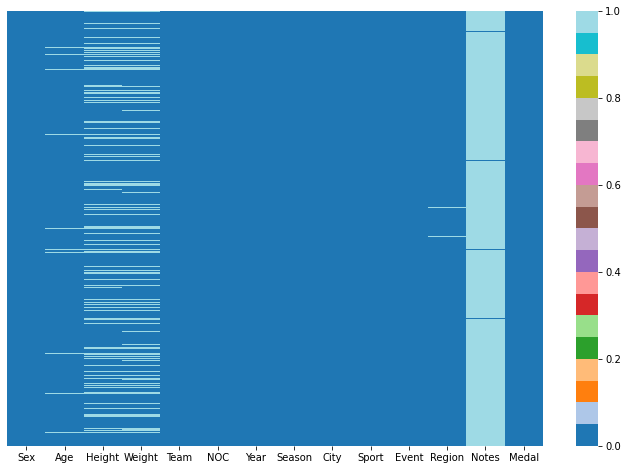

In [21]:
plt.figure(figsize=(12,8))

sns.heatmap(athletesReg.isnull(), yticklabels=False, cbar=True, cmap='tab20')

- From the above NULL values check we understand that we have NULL values in columns 'Age', 'Height', 'Weight', 'Region', 'Notes' and 'Medal'.
- Out of the above columns, column 'Medal' has NULL values because of the obvious reason that not every athlete wins a Medal.
- The percentage of NULL values in column 'Notes' is 98%, which is a huge number hence dropping this column seems to be a fair decision as it will definitely not contribute towards the final prediction we make.
- Columns 'Age', 'Height', 'Weight' are numerical columns and ones whose NULL values can be filled with Mean of the column. 
- For column 'Region', we will check exactly how many NULL records are there and if its number is too small, we can move ahead with dropping those records.

In [22]:
athletesReg.drop(['Notes'], axis=1, inplace=True)

In [23]:
athletesReg.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Region,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,China,0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,China,0
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Denmark,0
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,1
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Netherlands,0


In [24]:
athletesReg.isnull().sum()

Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Region      370
Medal         0
dtype: int64

In [25]:
athletesReg.shape

(271116, 13)

- So, out of the total 271,116 records in the dataset, we just have 370 NULLs in the 'Region' column. Hence, lets move ahead with dropping those records.

In [26]:
athletesReg = athletesReg.dropna(subset=['Region'])

In [27]:
athletesReg.isnull().sum()

Sex           0
Age        9460
Height    60078
Weight    62782
Team          0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Region        0
Medal         0
dtype: int64

In [28]:
athletesReg.shape

(270746, 13)

- We don't have any NULLs in the region column now

### Replacing NULLs with the grouped mean found from the below code.

In [29]:
athletesReg.groupby(['Medal','Sex']).mean().astype(np.int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1992
      M     26     178      75  1974
1     F     24     170      63  1992
      M     26     181      79  1966

In [30]:
for col in ['Age', 'Height', 'Weight']:  
    athletesReg[col] = athletesReg.groupby(['Medal','Sex'])[col].apply(lambda x: x.fillna(x.mean()).astype(np.int))

In [31]:
athletesReg.isnull().sum()

Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Region    0
Medal     0
dtype: int64

In [32]:
athletesReg.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Region,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,China,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,China,0
2,M,24,178,75,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Denmark,0
3,M,34,181,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Netherlands,0


## Data Visualization

In [33]:
Top10Countries = athletesReg.Team.value_counts().sort_values(ascending=False).head(10)
Top10Countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

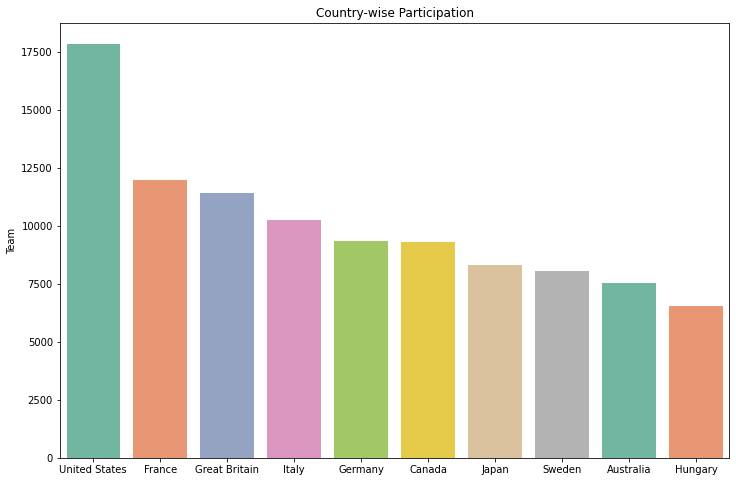

In [34]:
# Plotting graph for Top 10 countries

plt.figure(figsize=(12,8))
plt.title('Country-wise Participation')
sns.barplot(x=Top10Countries.index, y=Top10Countries, palette='Set2');

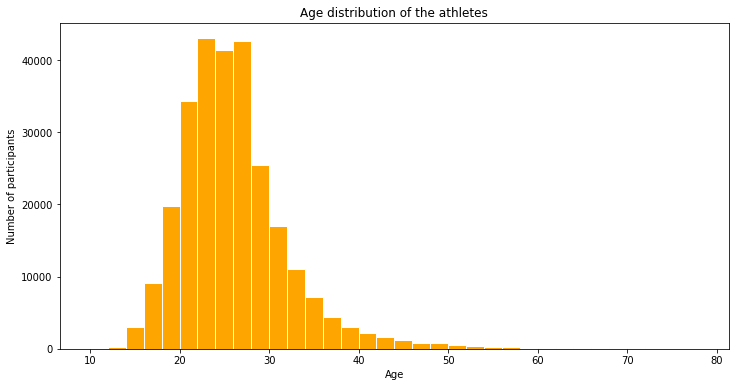

In [35]:
# Age distribution of the participants

plt.figure(figsize=(12,6))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletesReg.Age, bins=np.arange(10,80,2), color='orange', edgecolor='white');

In [36]:
# Summer Olympic Sports

summerSports = athletesReg[athletesReg.Season=='Summer'].Sport.unique()
summerSports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [37]:
winterSports = athletesReg[athletesReg.Season=='Winter'].Sport.unique()
winterSports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [38]:
# Male & Female Participants

genderCount = athletesReg.Sex.value_counts()
genderCount

M    196360
F     74386
Name: Sex, dtype: int64

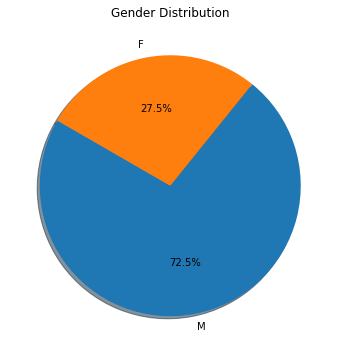

In [39]:
# Pie-Chart for Gender Athletes

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(genderCount, labels=genderCount.index, autopct='%1.1f%%', startangle=150, shadow=True);

In [40]:
womenOlympics = athletesReg[(athletesReg.Sex == 'F') & (athletesReg.Season == 'Summer')]

Text(0.5, 1.0, 'Plot of Female Athletes over time')

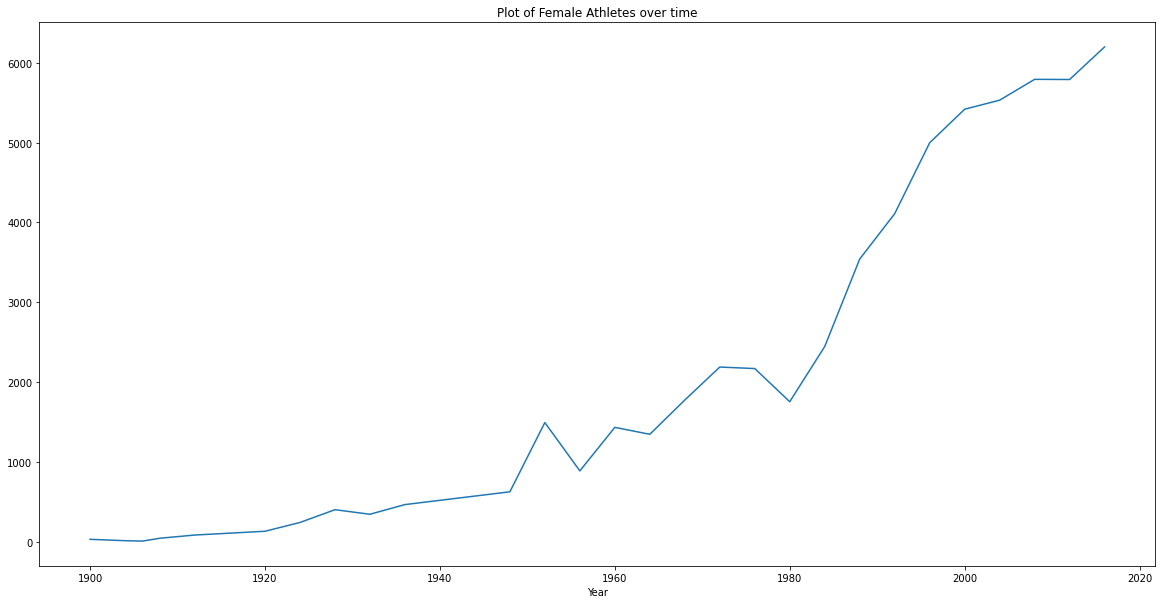

In [41]:
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

## Label Encoding

In [42]:
{column: len(athletesReg[column].unique()) for column in athletesReg.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 1176,
 'NOC': 226,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765,
 'Region': 205}

- Above, we understand that there are two columns containing just two different types of values which are Sex and Season.
- All the other columns above contain a huge number of distinct values.
- Hence, for the Sex and Season variables we will create a BinaryEncoding function and for the other columns we will create OneHotEncoder function.

In [43]:
def BinaryEncoding(df, columns, positive_values):
    df=df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df

def OneHotEncoder(df, columns, prefixes):
    df=df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df=pd.concat([df, dummies], axis=1)
        df=df.drop(column, axis=1)
    return df


In [44]:
athletesReg.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Region,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,China,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,China,0
2,M,24,178,75,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Denmark,0
3,M,34,181,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Netherlands,0


In [45]:
athletesReg = BinaryEncoding(
        athletesReg,
        columns=['Sex','Season'],
        positive_values=['M','Summer']
)

athletesReg = OneHotEncoder(
        athletesReg,
        columns=['Team','NOC','City','Sport','Event'],
        prefixes=['T','N','C','S','E']
)

In [46]:
print('Remaining non-numeric columns:', len(athletesReg.select_dtypes('object').columns))

Remaining non-numeric columns: 1


In [47]:
athletesReg.head()

,Sex,Age,Height,Weight,Year,Season,Region,Medal,T_30. Februar,T_A North American Team,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,1992,1,China,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,China,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,178,75,1920,1,Denmark,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,181,79,1900,1,Denmark,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,Netherlands,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- We can drop the Region column as it has redundant data as in the column Team.

In [48]:
athletesReg=athletesReg.drop(['Region'], axis=1)

In [49]:
athletesReg.head()

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,178,75,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,181,79,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
print('Remaining non-numeric columns:', len(athletesReg.select_dtypes('object').columns))

Remaining non-numeric columns: 0


### Visualizing Correlations

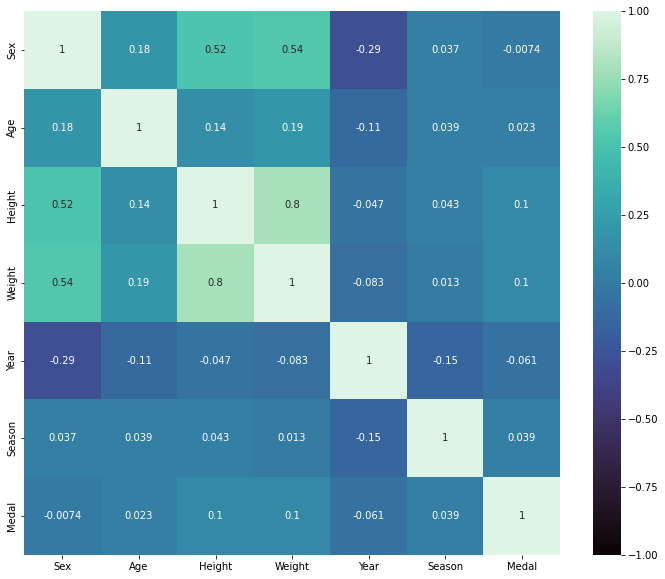

In [51]:
corr=athletesReg.loc[:, :'Medal'].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

### Split/Scale the data

In [52]:
X=athletesReg.drop('Medal', axis=1).copy()
y=athletesReg['Medal'].copy()

In [53]:
scaler = StandardScaler()

X=scaler.fit_transform(X)

In [54]:
athletesReg['Medal']

0         0
1         0
2         0
3         1
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 270746, dtype: int64

In [55]:
y.shape

(270746,)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Training

In [57]:
X.shape

(270746, 2281)

In [58]:
print('Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%'.format(y_train.mean() * 100, (1 - y_train.mean()) *100))

Class Distribution (Positive to Negative): 14.7% / 85.3%


In [59]:
inputs = tf.keras.Input(shape=(X.shape[1]))
x=tf.keras.layers.Dense(64, activation='relu')(inputs)
x=tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model=tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size= 32,
    epochs= 100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
        )
    ]
)

Epoch 1/100
4739/4739 [==============================] - 17s 3ms/step - loss: 0.3320 - accuracy: 0.8725 - auc: 0.8042 - val_loss: 0.3033 - val_accuracy: 0.8843 - val_auc: 0.8423
Epoch 2/100
4739/4739 [==============================] - 19s 4ms/step - loss: 0.2755 - accuracy: 0.8942 - auc: 0.8696 - val_loss: 0.2769 - val_accuracy: 0.8957 - val_auc: 0.8692
Epoch 3/100
4739/4739 [==============================] - 17s 4ms/step - loss: 0.2473 - accuracy: 0.9049 - auc: 0.8969 - val_loss: 0.2616 - val_accuracy: 0.9037 - val_auc: 0.8819
Epoch 4/100
4739/4739 [==============================] - 16s 3ms/step - loss: 0.2247 - accuracy: 0.9144 - auc: 0.9156 - val_loss: 0.2569 - val_accuracy: 0.9082 - val_auc: 0.8879
Epoch 5/100
4739/4739 [==============================] - 17s 3ms/step - loss: 0.2066 - accuracy: 0.9208 - auc: 0.9293 - val_loss: 0.2487 - val_accuracy: 0.9128 - val_auc: 0.8961
Epoch 6/100
4739/4739 [==============================] - 16s 3ms/step - loss: 0.1921 - accuracy: 0.9260 - auc:

In [60]:
model.evaluate(X_test, y_test)

2539/2539 [==============================] - 6s 2ms/step - loss: 0.2462 - accuracy: 0.9148 - auc: 0.8969


[0.24620835483074188, 0.9147542715072632, 0.8969166874885559]

In [61]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test)>=0.5, dtype=np.int))

In [62]:
print('Classification Report: \n\n', classification_report(y_true, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95     69279
           1       0.81      0.55      0.65     11945

    accuracy                           0.91     81224
   macro avg       0.87      0.76      0.80     81224
weighted avg       0.91      0.91      0.91     81224



In [63]:
print('Confusion Matrix: \n', confusion_matrix(y_true, y_pred))

Confusion Matrix: 
 [[67774  1505]
 [ 5419  6526]]


#### Hence, from the analysis above we find that the accuracy of the model with negative values is about 98% and for positive ones is about 55%.
#### The low accuracy score of positive data is probably because we had too less of that data.